In [1]:
!pip install -q seaborn==0.13.2


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install -q squarify


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install -q imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

/tmp/ipykernel_14/2564461308.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customers/BankChurners.csv


### Importing dataset

In [6]:
new_column_names = {
    'CLIENTNUM': 'ID',
    'Customer_Age': 'Age',
    'Gender': 'Gender',
    'Dependent_count': 'Dependents',
    'Education_Level': 'Education',
    'Marital_Status': 'Marital_Stat',
    'Income_Category': 'Income',
    'Card_Category': 'Card_Type',
    'Months_on_book': 'Mo_Book',
    'Total_Relationship_Count': 'Tot_Products',
    'Months_Inactive_12_mon': 'Mo_Inactive',
    'Contacts_Count_12_mon': 'Contacts_Count',
    'Credit_Limit': 'Crd_Limit',
    'Total_Revolving_Bal': 'Tot_Debt_Bal',
    'Avg_Open_To_Buy': 'Avg_Crd_Avail',
    'Total_Amt_Chng_Q4_Q1': 'Amt_Q4_Q1',
    'Total_Trans_Amt': 'Tot_Trans_Amt',
    'Total_Trans_Ct': 'Tot_Trans_Cnt',
    'Total_Ct_Chng_Q4_Q1': 'Cnt_Q4_Q1',
    'Avg_Utilization_Ratio': 'Avg_Util_Ratio',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB_clf_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_clf_2',
    'Attrition_Flag': 'Label'
} 

In [7]:
df = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
df = df.rename(columns=new_column_names)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10127 non-null  int64  
 1   Label           10127 non-null  object 
 2   Age             10127 non-null  int64  
 3   Gender          10127 non-null  object 
 4   Dependents      10127 non-null  int64  
 5   Education       10127 non-null  object 
 6   Marital_Stat    10127 non-null  object 
 7   Income          10127 non-null  object 
 8   Card_Type       10127 non-null  object 
 9   Mo_Book         10127 non-null  int64  
 10  Tot_Products    10127 non-null  int64  
 11  Mo_Inactive     10127 non-null  int64  
 12  Contacts_Count  10127 non-null  int64  
 13  Crd_Limit       10127 non-null  float64
 14  Tot_Debt_Bal    10127 non-null  int64  
 15  Avg_Crd_Avail   10127 non-null  float64
 16  Amt_Q4_Q1       10127 non-null  float64
 17  Tot_Trans_Amt   10127 non-null 

In [9]:
df[["Label", "Gender", "Education", "Marital_Stat", "Income", "Card_Type"]] = df[["Label", "Gender", "Education", "Marital_Stat", "Income", "Card_Type"]].astype('category')
df[["Dependents", "Tot_Products", "Contacts_Count"]] = df[["Dependents", "Tot_Products", "Contacts_Count"]].astype('category')

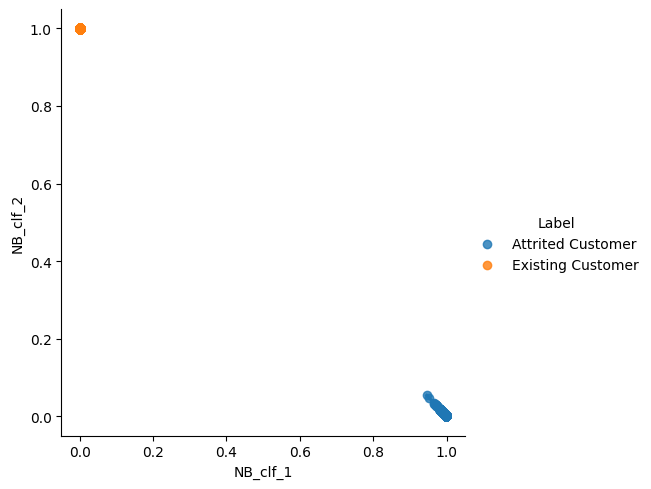

In [10]:
sns.lmplot(data=df, x="NB_clf_1", y="NB_clf_2", hue="Label")

In [11]:
df = df.drop(["ID", "NB_clf_1", "NB_clf_2"], axis=1)

In [12]:
label_mapping = {"Existing Customer": 0, "Attrited Customer": 1}
df["Label"] = df["Label"].map(label_mapping)

In [13]:
df.iloc[:, :13]

,Label,Age,Gender,Dependents,Education,Marital_Stat,Income,Card_Type,Mo_Book,Tot_Products,Mo_Inactive,Contacts_Count,Crd_Limit
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0


In [14]:
df.iloc[:, 10:]

,Mo_Inactive,Contacts_Count,Crd_Limit,Tot_Debt_Bal,Avg_Crd_Avail,Amt_Q4_Q1,Tot_Trans_Amt,Tot_Trans_Cnt,Cnt_Q4_Q1,Avg_Util_Ratio
0,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...
10122,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [15]:
print(df.isna().sum())

Label             0
Age               0
Gender            0
Dependents        0
Education         0
Marital_Stat      0
Income            0
Card_Type         0
Mo_Book           0
Tot_Products      0
Mo_Inactive       0
Contacts_Count    0
Crd_Limit         0
Tot_Debt_Bal      0
Avg_Crd_Avail     0
Amt_Q4_Q1         0
Tot_Trans_Amt     0
Tot_Trans_Cnt     0
Cnt_Q4_Q1         0
Avg_Util_Ratio    0
dtype: int64


In [16]:
np.round(df.describe())[1:]

,Age,Mo_Book,Mo_Inactive,Crd_Limit,Tot_Debt_Bal,Avg_Crd_Avail,Amt_Q4_Q1,Tot_Trans_Amt,Tot_Trans_Cnt,Cnt_Q4_Q1,Avg_Util_Ratio
mean,46.0,36.0,2.0,8632.0,1163.0,7469.0,1.0,4404.0,65.0,1.0,0.0
std,8.0,8.0,1.0,9089.0,815.0,9091.0,0.0,3397.0,23.0,0.0,0.0
min,26.0,13.0,0.0,1438.0,0.0,3.0,0.0,510.0,10.0,0.0,0.0
25%,41.0,31.0,2.0,2555.0,359.0,1324.0,1.0,2156.0,45.0,1.0,0.0
50%,46.0,36.0,2.0,4549.0,1276.0,3474.0,1.0,3899.0,67.0,1.0,0.0
75%,52.0,40.0,3.0,11068.0,1784.0,9859.0,1.0,4741.0,81.0,1.0,1.0
max,73.0,56.0,6.0,34516.0,2517.0,34516.0,3.0,18484.0,139.0,4.0,1.0


In [17]:
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.__version__

'0.13.2'

In [18]:
continuous_cols = df.select_dtypes('number').drop(['Mo_Book', 'Mo_Inactive'], axis=1).columns
continuous_cols

Index(['Age', 'Crd_Limit', 'Tot_Debt_Bal', 'Avg_Crd_Avail', 'Amt_Q4_Q1',
       'Tot_Trans_Amt', 'Tot_Trans_Cnt', 'Cnt_Q4_Q1', 'Avg_Util_Ratio'],
      dtype='object')

In [19]:
numerical_cols = df.select_dtypes('number').columns
numerical_cols 

Index(['Age', 'Mo_Book', 'Mo_Inactive', 'Crd_Limit', 'Tot_Debt_Bal',
       'Avg_Crd_Avail', 'Amt_Q4_Q1', 'Tot_Trans_Amt', 'Tot_Trans_Cnt',
       'Cnt_Q4_Q1', 'Avg_Util_Ratio'],
      dtype='object')

In [20]:
category_cols = df.select_dtypes('category').columns
category_cols

Index(['Label', 'Gender', 'Dependents', 'Education', 'Marital_Stat', 'Income',
       'Card_Type', 'Tot_Products', 'Contacts_Count'],
      dtype='object')

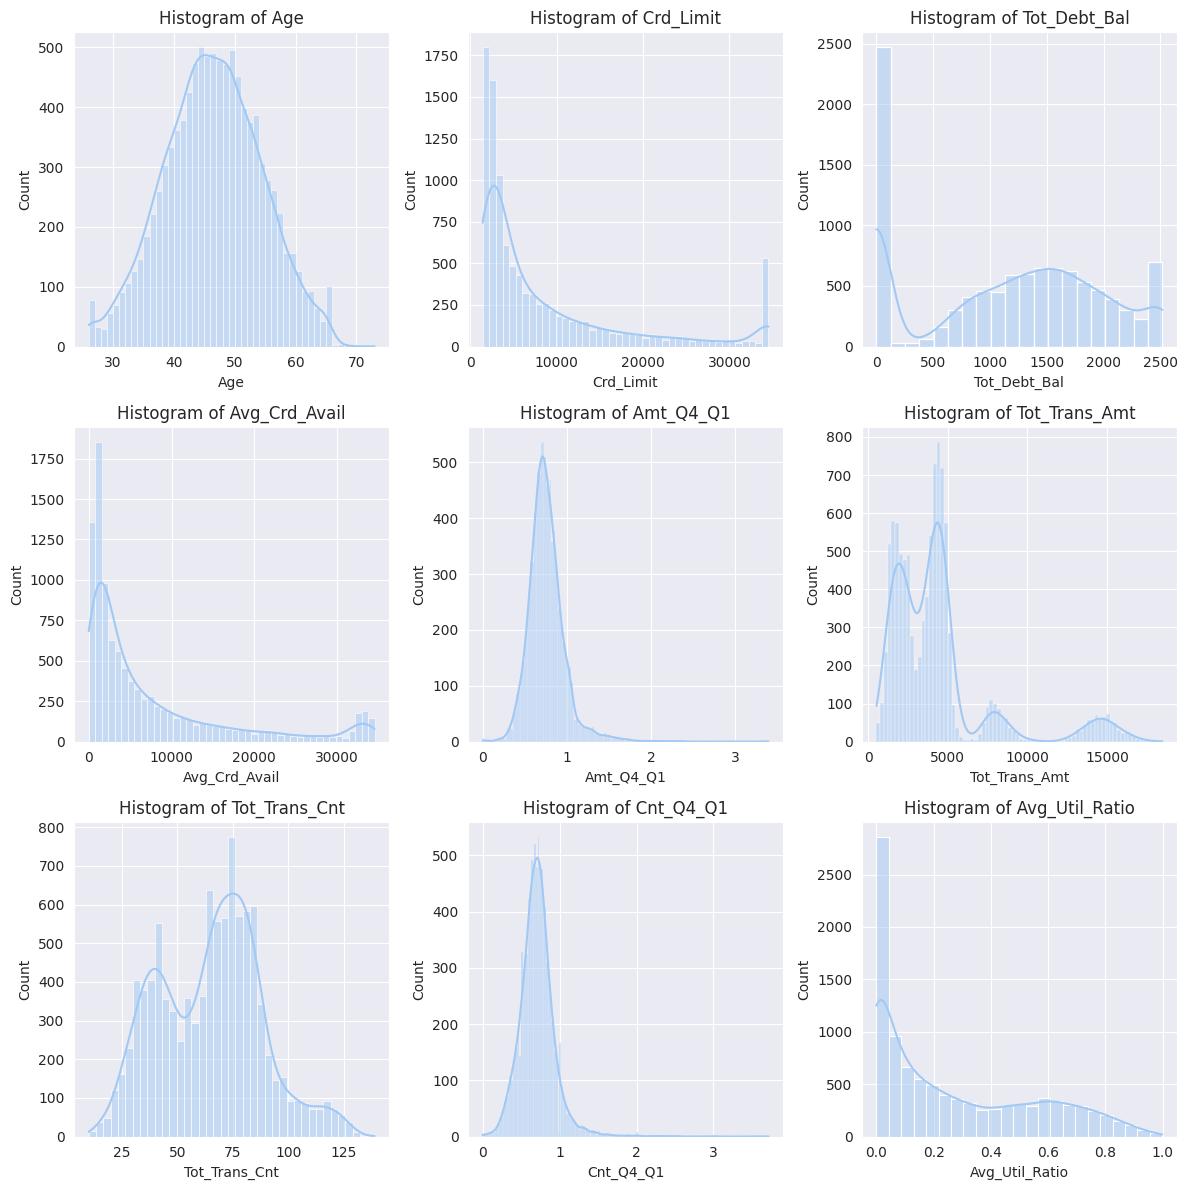

In [21]:
# Set up the subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Plot histograms for each continuous column
for i, col in enumerate(continuous_cols):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)

# Adjust layout and display plot
plt.tight_layout()
plt.show();

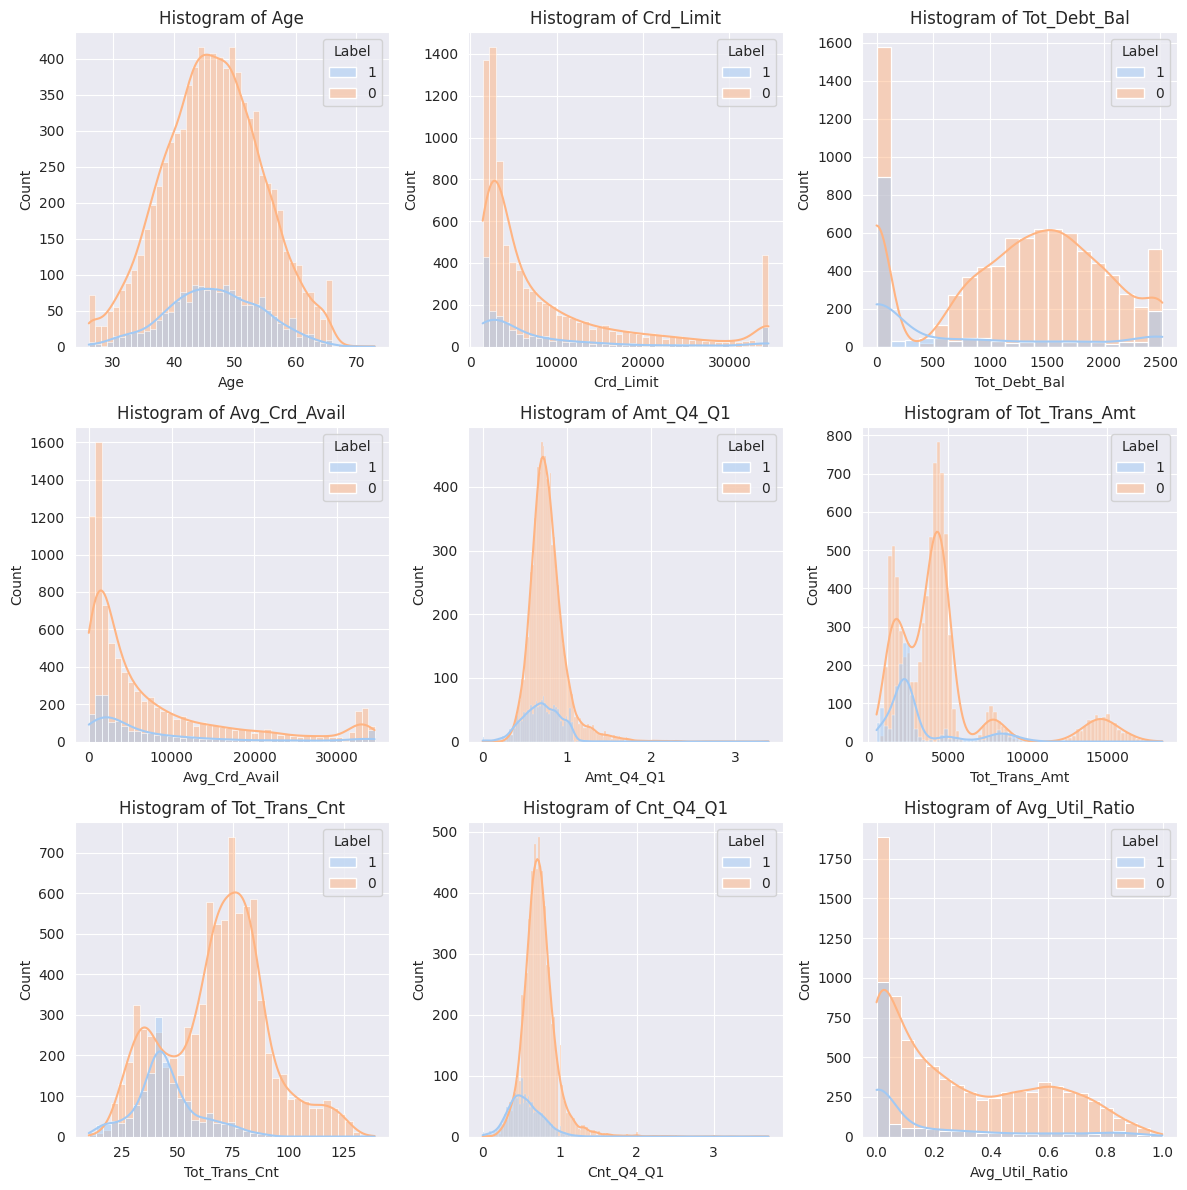

In [22]:
# Set up the subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Plot histograms for each continuous column
for i, col in enumerate(continuous_cols):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    sns.histplot(df, x=col, kde=True, ax=ax, hue="Label", multiple="layer")
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)

# Adjust layout and display plot
plt.tight_layout()
plt.show();

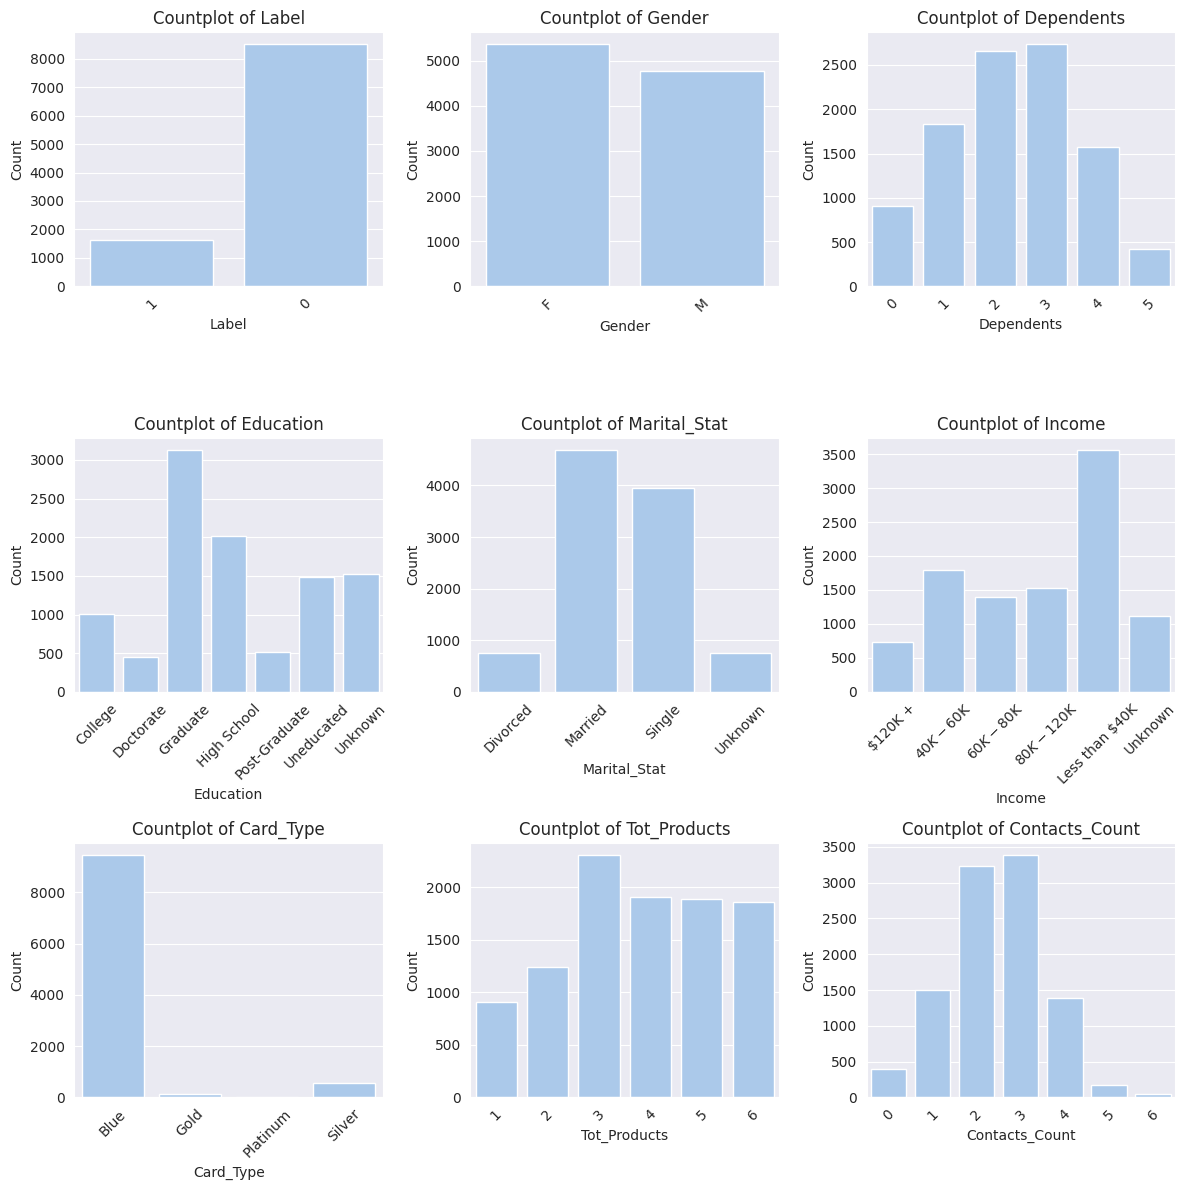

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Plot countplot for each object column
for i, col in enumerate(category_cols):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis = 'x', rotation=45)
    
# Adjust layout
plt.tight_layout()
plt.show()

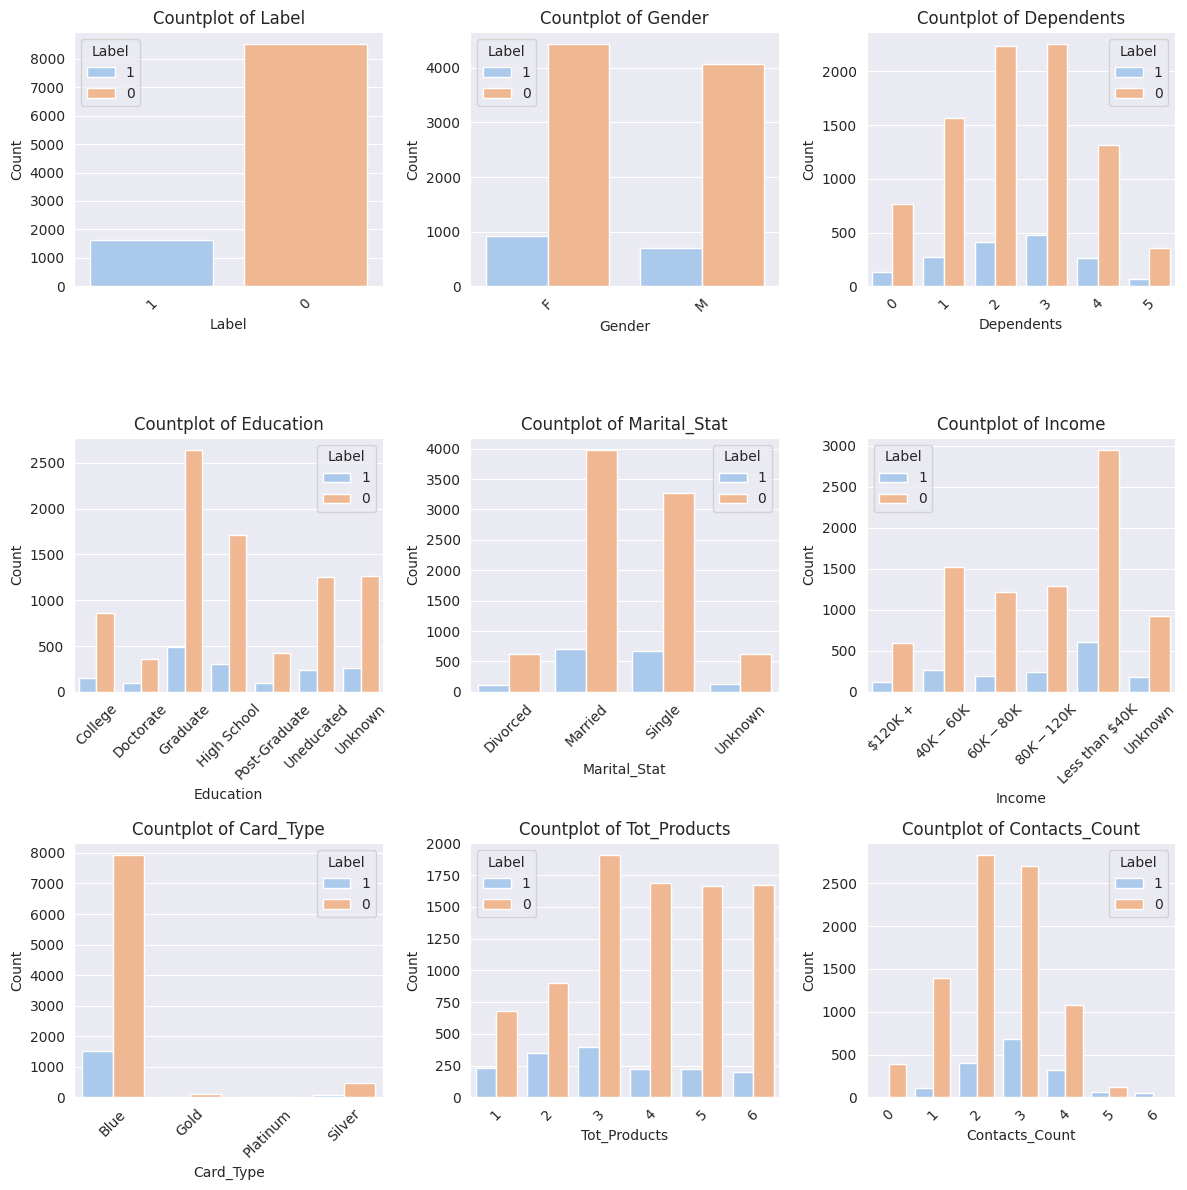

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Plot countplot for each object column
for i, col in enumerate(category_cols):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]
    sns.countplot(data=df, x=col, ax=ax, hue='Label')
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis = 'x', rotation=45)
    
# Adjust layout
plt.tight_layout()
plt.show()

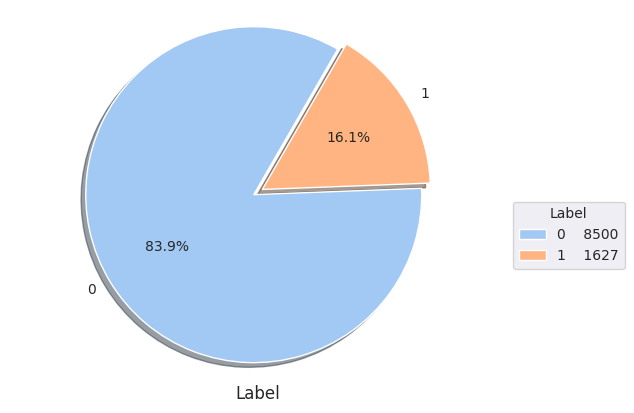

In [25]:
fig, ax = plt.subplots()
counter = df["Label"].value_counts()
ax.pie(counter, labels=counter.index, autopct='%1.1f%%', explode=(0.03, 0.03), shadow=True, startangle=60)
ax.set_xlabel("Label", fontsize=12)
ax.axis('equal')
legend = counter.reset_index().apply(lambda row: f"{row['Label']}    {row['count']}", axis=1)
ax.legend(legend, title="Label", loc='upper left', bbox_to_anchor=(1, 0.5));

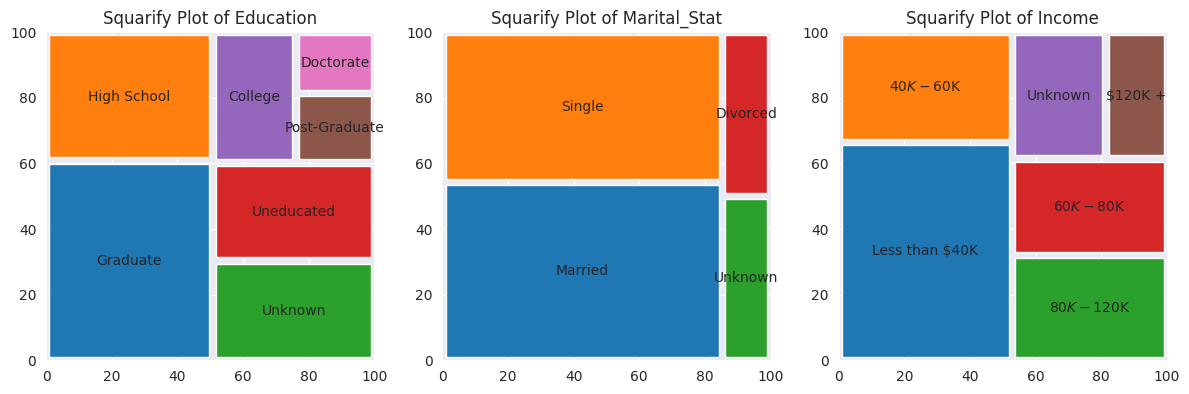

In [26]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(["Education", "Marital_Stat", "Income"]):
    ax = axes[i]
    counts = df[col].value_counts()
    colors = plt.cm.tab10(range(len(counts)))
    squarify.plot(sizes=counts, label=counts.index, ax=ax, color=colors, pad=1)
    ax.set_title(f'Squarify Plot of {col}')
    ax.set_aspect('equal')  

# Adjust layout
plt.tight_layout()
plt.show()

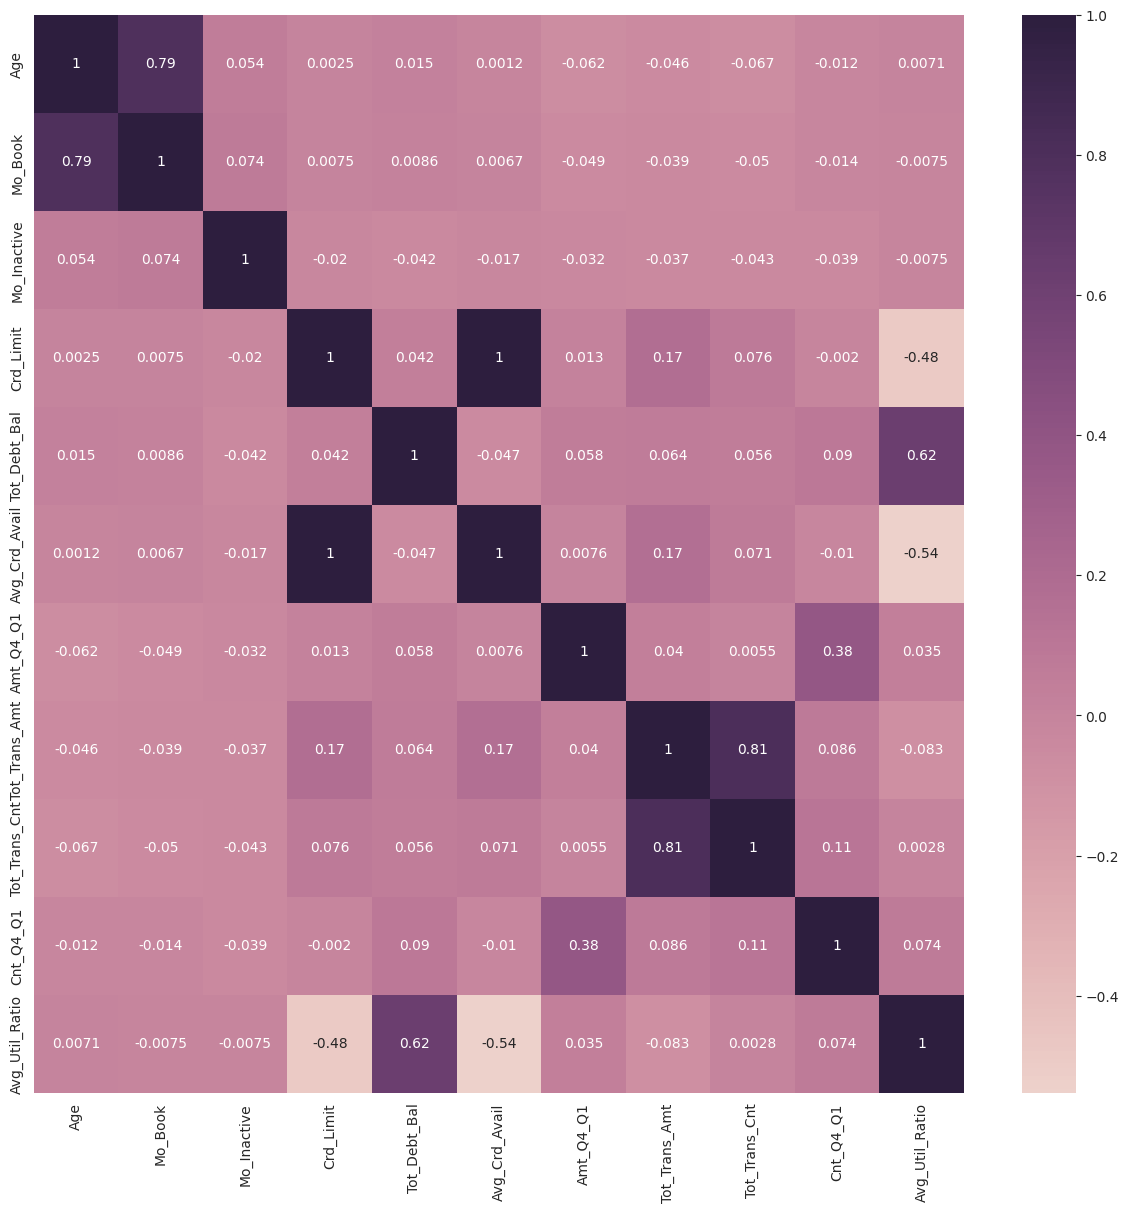

In [27]:
fig, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(df[numerical_cols].corr(), annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True));

- in age-genre plot we can apply two distribution t-test to know that man heigh's are significatnly taller than womans??

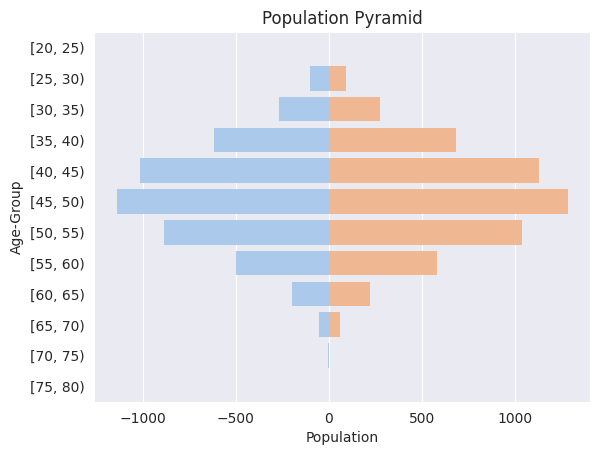

In [28]:
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

df['AgeRange'] = pd.cut(df['Age'], bins=bins, right=False)

age_gender_counts = pd.crosstab(df["AgeRange"], df["Gender"]).reset_index()
age_gender_counts['M'] *= -1

# Plot population pyramid
bar_plot = sns.barplot(x='M', y='AgeRange', data=age_gender_counts, lw=0)
sns.barplot(x='F', y='AgeRange', data=age_gender_counts, lw=0)

bar_plot.set(xlabel="Population", ylabel="Age-Group", title="Population Pyramid")

plt.show();

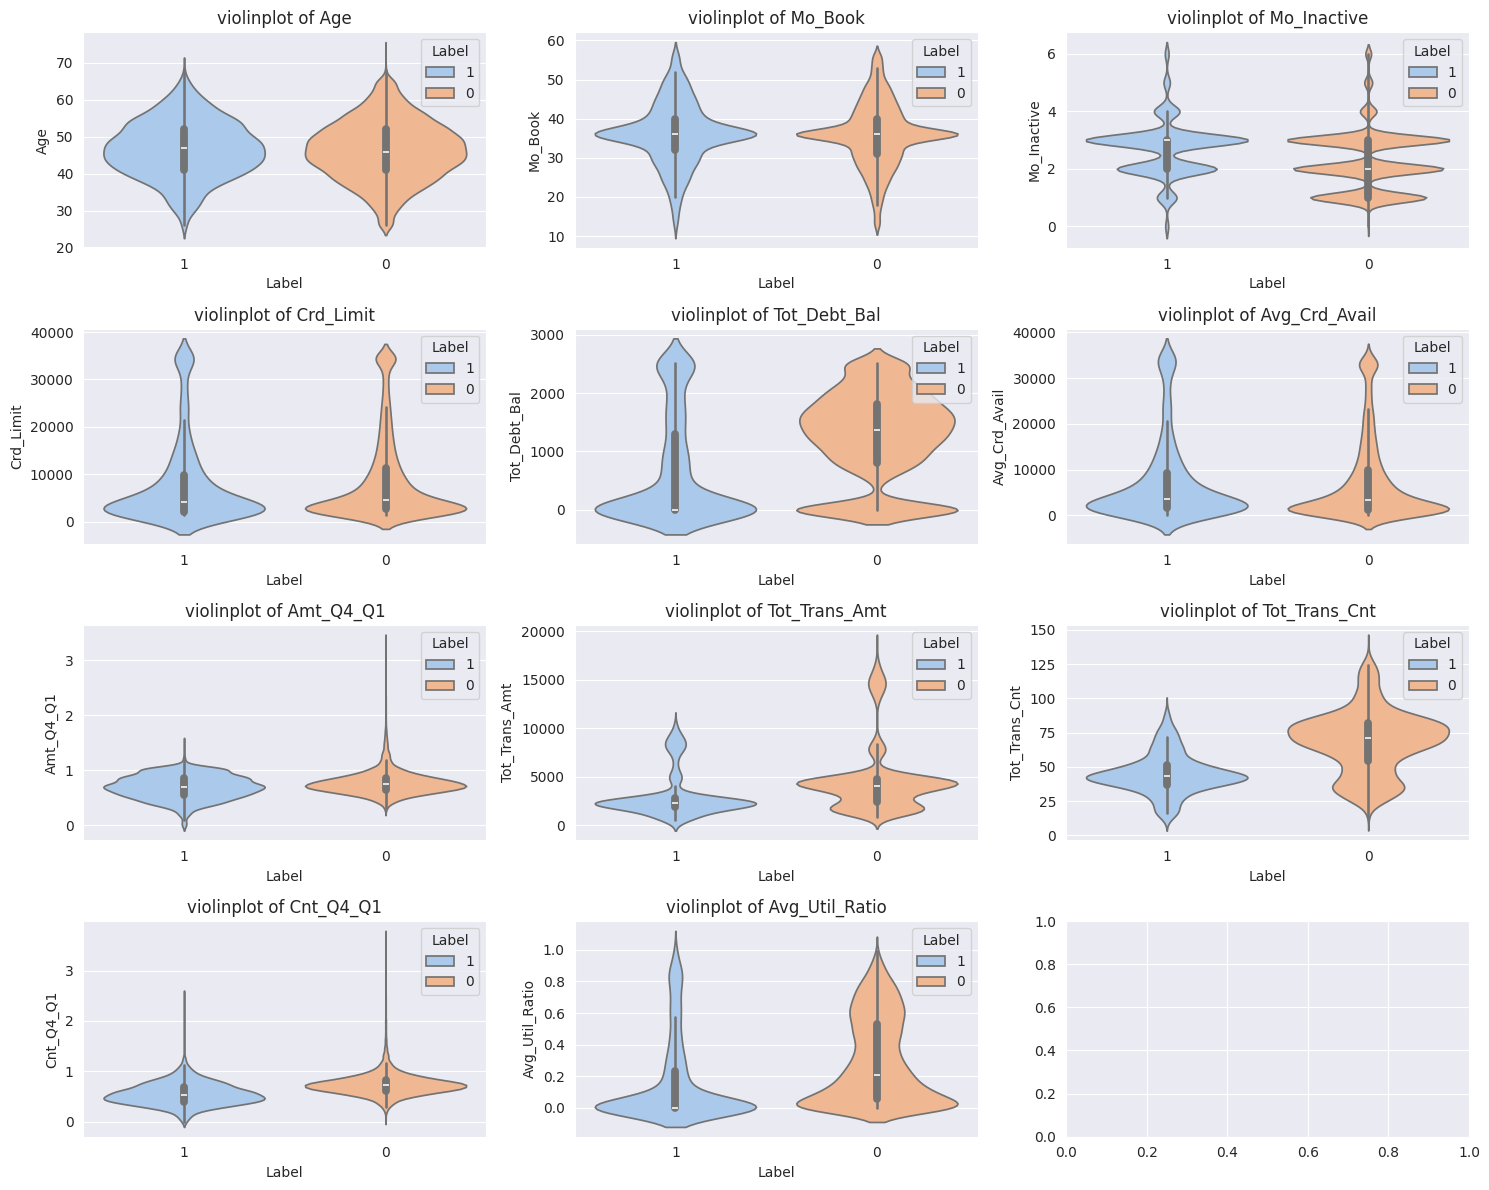

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Plot countplot for each object column
for i, col in enumerate(numerical_cols):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]
    sns.violinplot(data=df, x="Label", y=col, ax=ax, hue='Label')
    ax.set_title(f'violinplot of {col}')
    
# Adjust layout
plt.tight_layout()
plt.show()

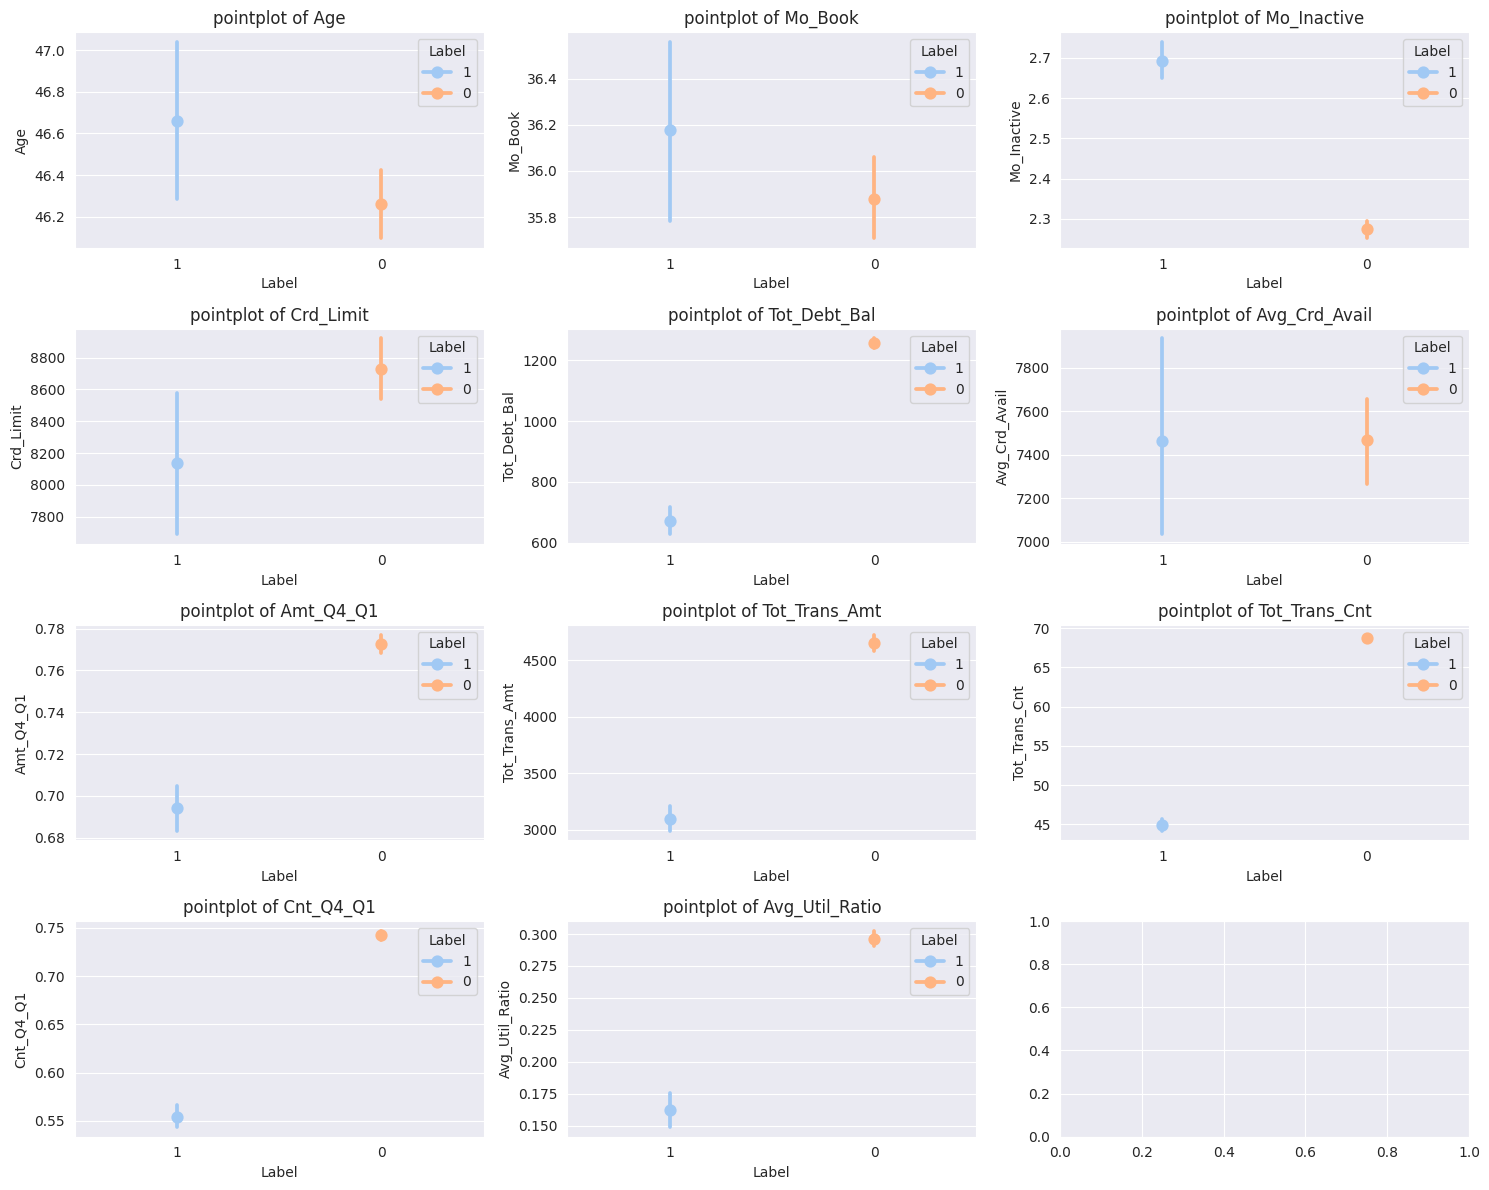

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Plot countplot for each object column
for i, col in enumerate(numerical_cols):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]
    sns.pointplot(data=df, x="Label", y=col, ax=ax, hue='Label')
    ax.set_title(f'pointplot of {col}')
    
# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
from scipy.stats import ttest_ind

for num_feature in numerical_cols:
    # Perform t-test for independent samples
    dist1 = df.loc[df["Label"]==0, num_feature]
    dist2 = df.loc[df["Label"]==1, num_feature]
    t_statistic, p_value = ttest_ind(dist1, dist2)

    # Print results
    print(f'{"-"*75}\nnum feature :{num_feature}:')
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Determine if there's a significant difference
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. ***There is a significant difference*** between Postive and Negative {num_feature}")
    else:
        print("Fail to reject the null hypothesis. ***There is no significant difference*** between Positive and Negative {num_feature}")


---------------------------------------------------------------------------
num feature :Age:
T-statistic: -1.8319590211710879
P-value: 0.06698688501759036
Fail to reject the null hypothesis. ***There is no significant difference*** between Positive and Negative {num_feature}
---------------------------------------------------------------------------
num feature :Mo_Book:
T-statistic: -1.377341848122166
P-value: 0.16843702876495353
Fail to reject the null hypothesis. ***There is no significant difference*** between Positive and Negative {num_feature}
---------------------------------------------------------------------------
num feature :Mo_Inactive:
T-statistic: -15.52128784291336
P-value: 1.0326639995929033e-53
Reject the null hypothesis. ***There is a significant difference*** between Postive and Negative {num_feature}
---------------------------------------------------------------------------
num feature :Crd_Limit:
T-statistic: 2.4028585836343748
P-value: 0.016285357205394337
Reje

In [32]:
def plot_stacked_barchart(data, var1, var2, ax):
    crosstab = pd.crosstab(data[var1], data[var2], normalize='index')
    crosstab_sorted = crosstab[crosstab.sum().sort_values(ascending=False).index]
    crosstab_sorted.plot(kind='bar', stacked=True, ax=ax, cmap='coolwarm')

In [33]:
from matplotlib.patches import ConnectionPatch
def create_bar_of_pie(pie_ratios, pie_labels, bar_ratios, bar_labels, width=0.2, line_width=2,
                      pie_title='', bar_title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
    fig.subplots_adjust(wspace=0)

    angle = -180 * pie_ratios[0]
    wedges, *_ = ax1.pie(pie_ratios, autopct='%1.1f%%', startangle=angle,
                         labels=pie_labels)
    ax1.set_title(pie_title)  

    bottom = 1
    for j, (height, label) in enumerate(reversed([*zip(bar_ratios, bar_labels)])):
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label)
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

    ax2.set_title(bar_title)  # Adding title for the bar chart
    ax2.legend()
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    theta1, theta2 = wedges[0].theta1, wedges[0].theta2
    center, r = wedges[0].center, wedges[0].r
    bar_height = sum(bar_ratios)

    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(line_width)
    ax2.add_artist(con)

    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(line_width)
    ax2.add_artist(con)

    plt.show();
    
def calculate_distributions(data, var1, var2):
    pie_distribution = (data[var1].value_counts() / len(df))
    bar_distribution = (data[var2].value_counts() / len(df))
    return pie_distribution, bar_distribution

def plot_bar_of_pie(data, var1, var2):
    pie_dist, bar_dist = calculate_distributions(data, var1, var2)
    create_bar_of_pie(pie_dist.values, pie_dist.index, bar_dist.values, bar_dist.index)

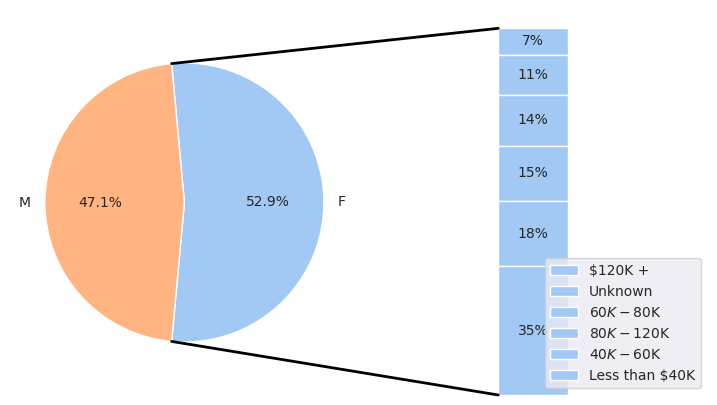

In [34]:
plot_bar_of_pie(df, "Gender", "Income")

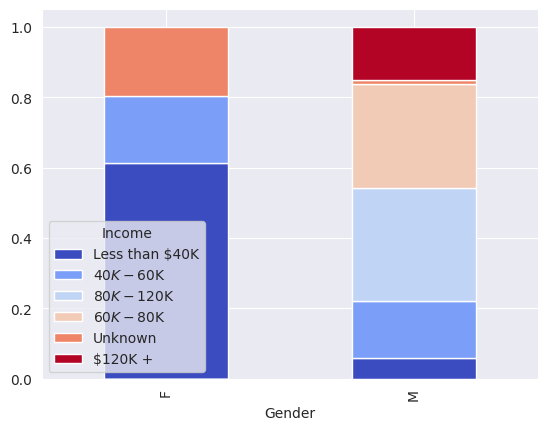

In [35]:
fig, ax = plt.subplots()
plot_stacked_barchart(df, "Gender", "Income", ax)

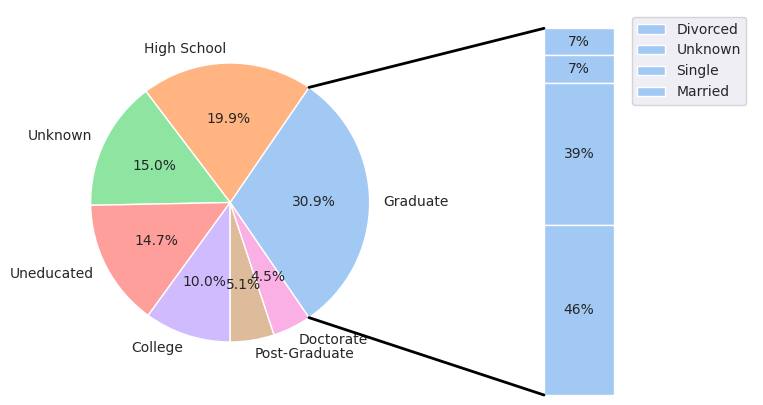

In [36]:
plot_bar_of_pie(df, "Education", "Marital_Stat")

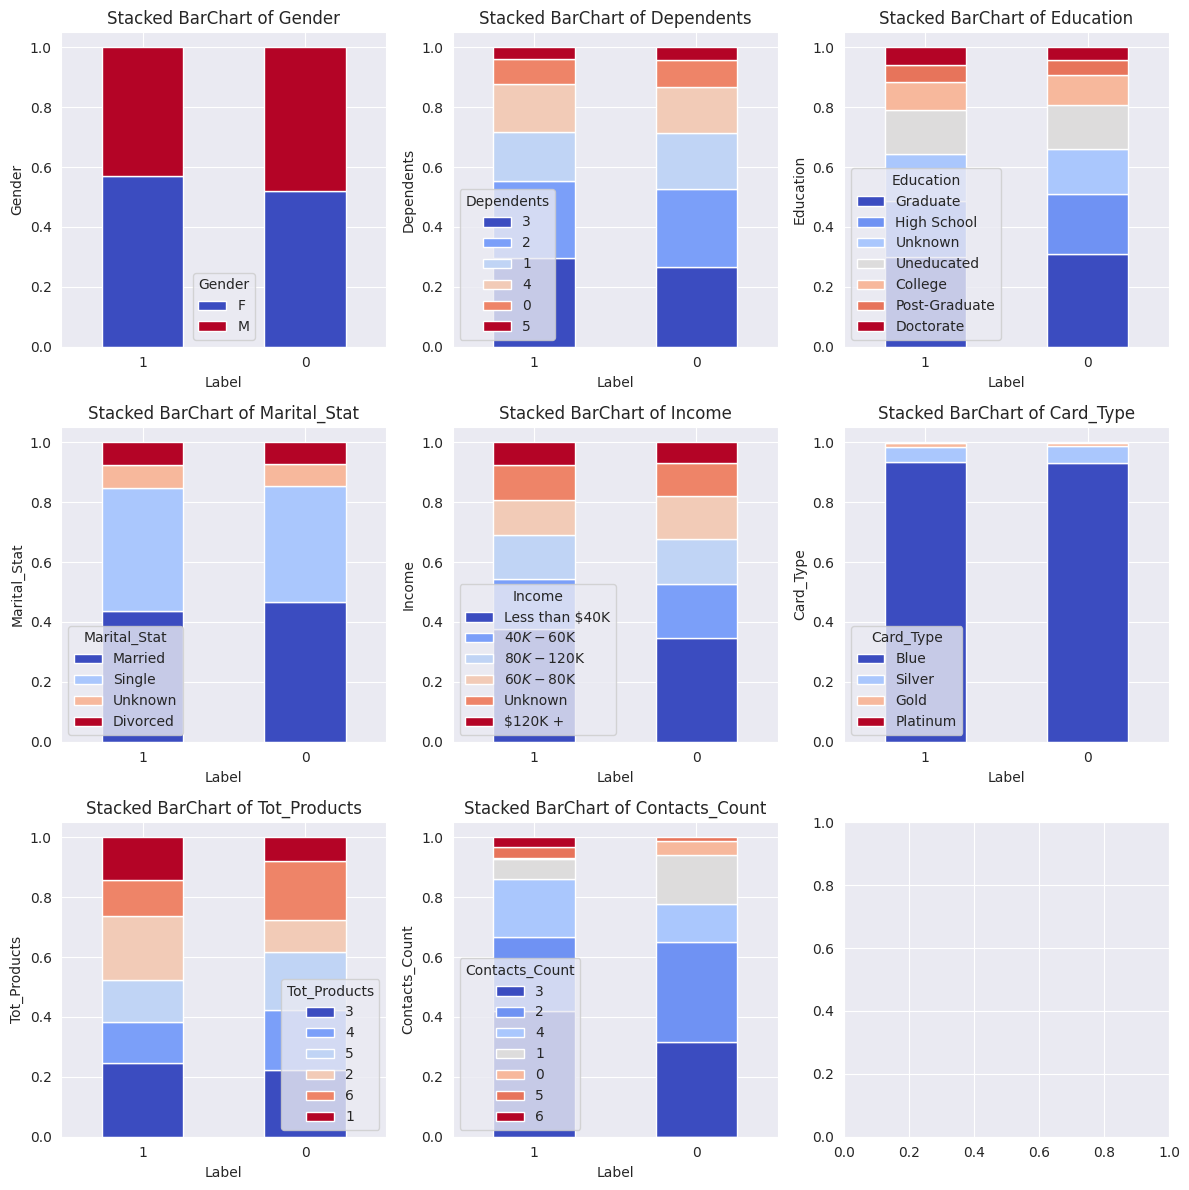

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Plot countplot for each object column
for i, col in enumerate(df[category_cols].drop("Label", axis=1)):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]
    plot_stacked_barchart(df, "Label", col, ax)
    ax.set_title(f'Stacked BarChart of {col}')
    ax.set_ylabel(col)
    ax.tick_params(axis = 'x', rotation=0)
    
# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
from scipy.stats import chi2_contingency

for cat_feature in category_cols:

    crosstab = pd.crosstab(df["Label"], df[cat_feature])
    chi2, p, _, _ = chi2_contingency(crosstab)

    print(f'{"-"*75}\ncat feature :{cat_feature}:')
    print("P-value:", p)

    alpha = 0.05  # Significance level
    if p < alpha:
        print(f"Reject the null hypothesis. {cat_feature} ***is related*** to Label")
    else:
        print(f"Fail to reject the null hypothesis. {cat_feature} ***is not related*** to Label")

---------------------------------------------------------------------------
cat feature :Label:
P-value: 0.0
Reject the null hypothesis. Label ***is related*** to Label
---------------------------------------------------------------------------
cat feature :Gender:
P-value: 0.00019635846717310269
Reject the null hypothesis. Gender ***is related*** to Label
---------------------------------------------------------------------------
cat feature :Dependents:
P-value: 0.09150463456682643
Fail to reject the null hypothesis. Dependents ***is not related*** to Label
---------------------------------------------------------------------------
cat feature :Education:
P-value: 0.05148913147336627
Fail to reject the null hypothesis. Education ***is not related*** to Label
---------------------------------------------------------------------------
cat feature :Marital_Stat:
P-value: 0.10891263394840227
Fail to reject the null hypothesis. Marital_Stat ***is not related*** to Label
------------------

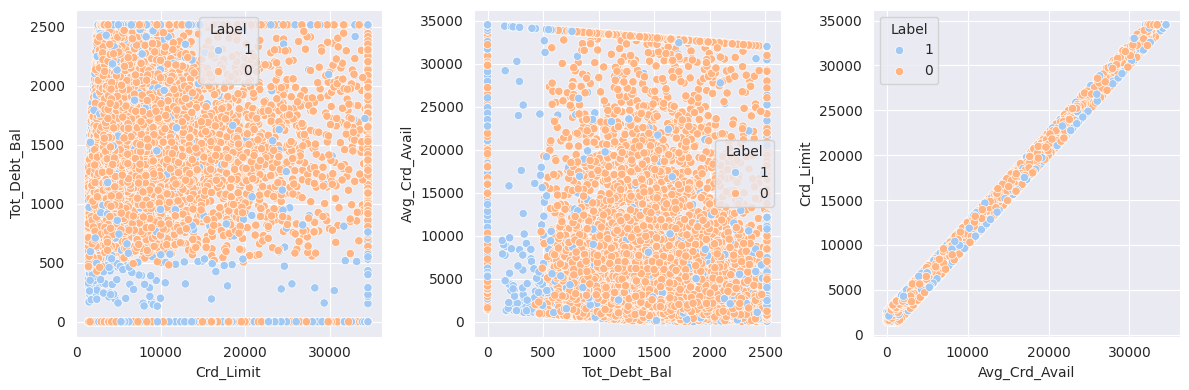

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot countplot for each object column
for i, cols in enumerate(zip(["Crd_Limit", "Tot_Debt_Bal", "Avg_Crd_Avail"], ["Tot_Debt_Bal", "Avg_Crd_Avail", "Crd_Limit"])):
    ax = axes[i]
    sns.scatterplot(data=df, x=cols[0], y=cols[1], ax=ax, hue='Label')
    ax.tick_params(axis = 'x', rotation=0)
    
# Adjust layout
plt.tight_layout()
plt.show()

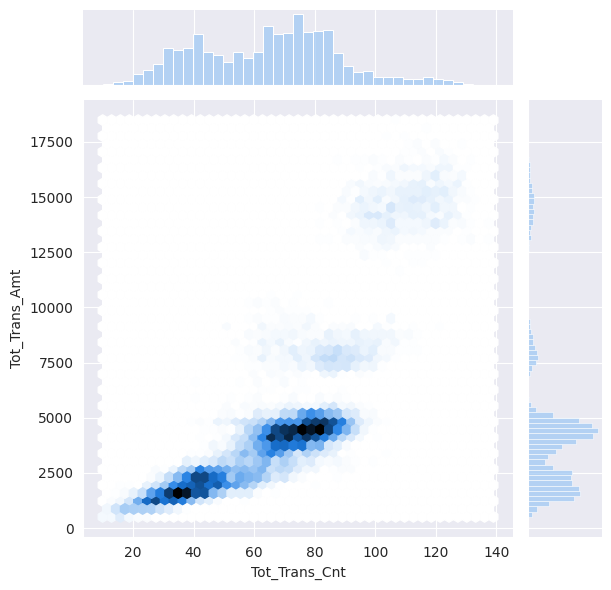

In [40]:
sns.jointplot(data=df, x="Tot_Trans_Cnt", y="Tot_Trans_Amt", kind='hex')

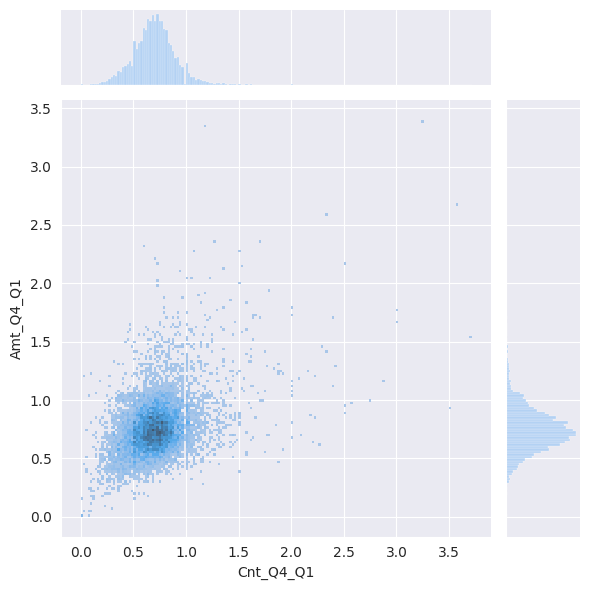

In [41]:
sns.jointplot(data=df, x="Cnt_Q4_Q1", y="Amt_Q4_Q1", kind='hist')

# preprocessing

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [43]:
X, y= df.drop("Label", axis=1), df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

## transforming

In [44]:
def plot_transform_diffs(new_x, old_x=None):
    num_cols = 1 if old_x is None else 2
    fig, axes = plt.subplots(2, num_cols, gridspec_kw={'height_ratios': [0.15, 0.85]})
    ax1 = axes[0 if old_x is None else (0, 0)]
    ax2 = axes[1 if old_x is None else (1, 0)]
    sns.boxplot(x=new_x, ax=ax1)
    sns.histplot(x=new_x, ax=ax2, kde=True)
    
    if old_x is not None:
        ax3 = axes[0, 1]
        ax4 = axes[1, 1]
        sns.boxplot(x=old_x, ax=ax3)
        sns.histplot(x=old_x, ax=ax4, kde=True)

In [45]:
std_scaler = StandardScaler()
robust_scaler = RobustScaler()
min_max_scaler = MinMaxScaler()

- Age

In [46]:
X_train["Age"] = std_scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = std_scaler.transform(X_test[["Age"]])

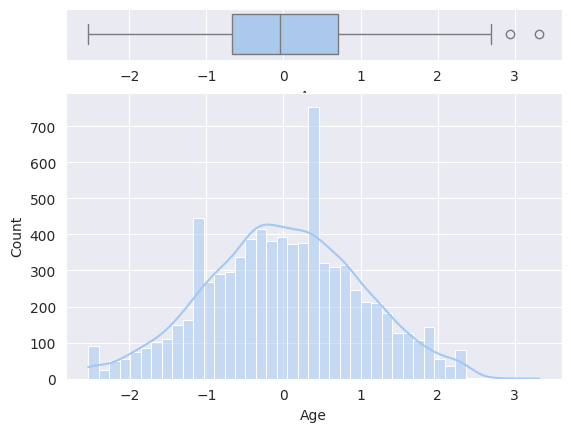

In [47]:
plot_transform_diffs(X_train["Age"])

* Mo_Book

In [48]:
X_train["Mo_Book"] = std_scaler.fit_transform(X_train[["Mo_Book"]])
X_test["Mo_Book"] = std_scaler.transform(X_test[["Mo_Book"]])

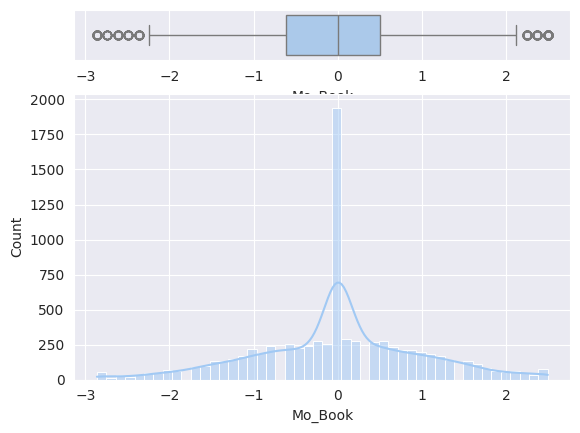

In [49]:
plot_transform_diffs(X_train["Mo_Book"])

- Mo_Inactive

In [50]:
old_x = X_train["Mo_Inactive"]

X_train["Mo_Inactive"] = min_max_scaler.fit_transform(X_train[["Mo_Inactive"]])
X_test["Mo_Inactive"] = min_max_scaler.transform(X_test[["Mo_Inactive"]])

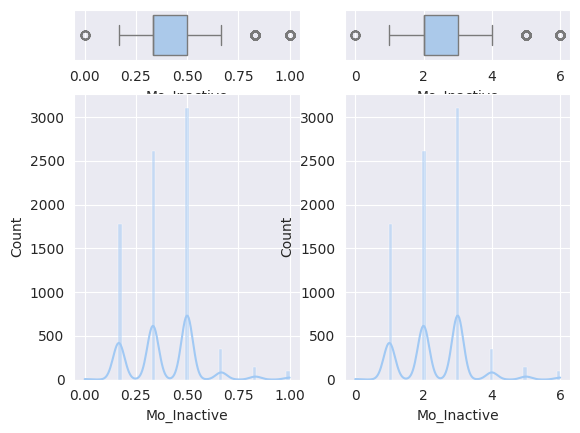

In [51]:
plot_transform_diffs(X_train["Mo_Inactive"], old_x)

- Crd_Limit

In [52]:
old_x = X_train["Crd_Limit"]

median = X_train["Crd_Limit"].median()

X_train.loc[X_train["Crd_Limit"] >= 25000, "Crd_Limit"] = median
X_test.loc[X_test["Crd_Limit"] >= 25000, "Crd_Limit"] = median

In [53]:
X_train["Crd_Limit"] = np.log(X_train["Crd_Limit"])
X_test["Crd_Limit"] = np.log(X_test["Crd_Limit"])

In [54]:
X_train["Crd_Limit"] = std_scaler.fit_transform(X_train[["Crd_Limit"]])
X_test["Crd_Limit"] = std_scaler.transform(X_test[["Crd_Limit"]])

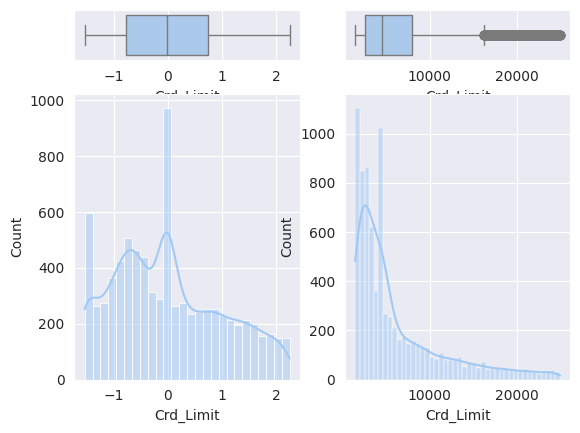

In [55]:
plot_transform_diffs(X_train["Crd_Limit"], old_x)

 - Tot_Debt_Bal

In [56]:
old_x = X_train["Tot_Debt_Bal"]

X_train["Tot_Debt_Bal"] = robust_scaler.fit_transform(X_train[["Tot_Debt_Bal"]])
X_test["Tot_Debt_Bal"] = robust_scaler.transform(X_test[["Tot_Debt_Bal"]])

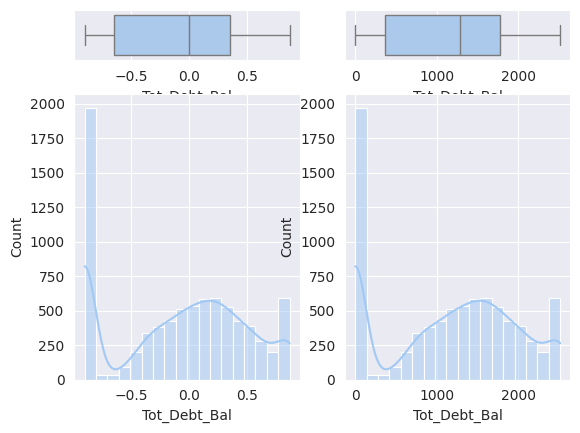

In [57]:
plot_transform_diffs(X_train["Tot_Debt_Bal"], old_x)

- Tot_Trans_Amt

In [58]:
X_train["Tot_Trans_Amt"] = robust_scaler.fit_transform(X_train[["Tot_Trans_Amt"]])
X_test["Tot_Trans_Amt"] = robust_scaler.transform(X_test[["Tot_Trans_Amt"]])

<Axes: xlabel='Tot_Trans_Amt', ylabel='Count'>

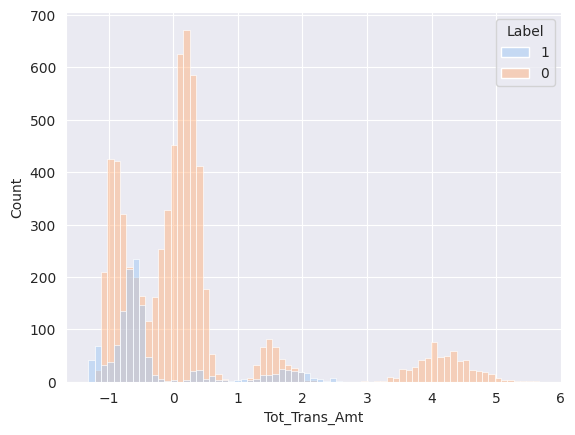

In [59]:
sns.histplot(x = X_train["Tot_Trans_Amt"], hue=y_train)

In [60]:
bins = [-np.inf, 0, 1, 2.5, np.inf]
train_cutted = pd.cut(X_train["Tot_Trans_Amt"], bins=bins, right=False)
test_cutted = pd.cut(X_test["Tot_Trans_Amt"], bins=bins, right=False)

In [61]:
X_train["Tot_Trans_Amt_categorized"] = train_cutted.astype('category')
X_test["Tot_Trans_Amt_categorized"] = test_cutted.astype('category')

<Axes: xlabel='Tot_Trans_Amt', ylabel='count'>

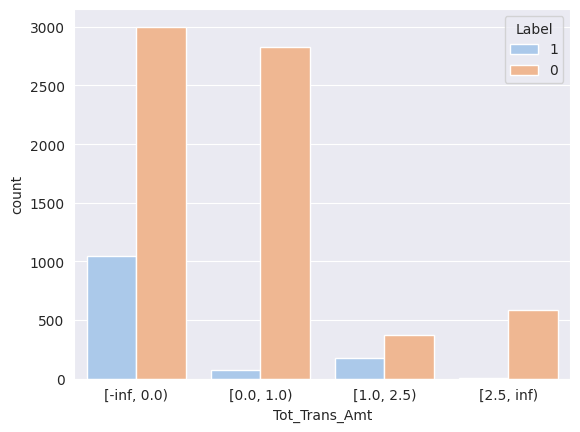

In [62]:
sns.countplot(x=train_cutted, hue=y_train)

In [63]:
crosstab = pd.crosstab(df["Label"], X_train["Tot_Trans_Amt_categorized"])
chi2, p, _, _ = chi2_contingency(crosstab)
print("P-value:", p)

P-value: 4.28771625199881e-194


- Tot_Trans_Cnt

In [64]:
X_train["Tot_Trans_Cnt"] = std_scaler.fit_transform(X_train[["Tot_Trans_Cnt"]])
X_test["Tot_Trans_Cnt"] = std_scaler.transform(X_test[["Tot_Trans_Cnt"]])

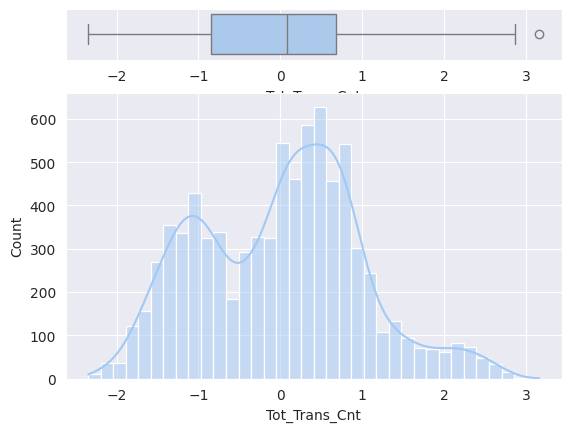

In [65]:
plot_transform_diffs(X_train["Tot_Trans_Cnt"])

- Avg_Util_Ratio

In [66]:
x_old = X_train["Avg_Util_Ratio"]

X_train["Avg_Util_Ratio"] = np.cbrt(X_train["Avg_Util_Ratio"])
X_test["Avg_Util_Ratio"] = np.cbrt(X_test["Avg_Util_Ratio"])

In [67]:
X_train["Avg_Util_Ratio"] = std_scaler.fit_transform(X_train[["Avg_Util_Ratio"]])
X_test["Avg_Util_Ratio"] = std_scaler.transform(X_test[["Avg_Util_Ratio"]])

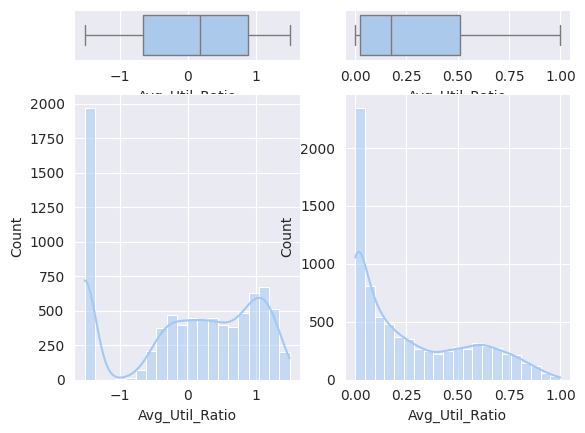

In [68]:
plot_transform_diffs(X_train["Avg_Util_Ratio"], x_old)

_

- dropping

In [69]:
dropped_cols = ["Avg_Crd_Avail", "Age", "Mo_Book"]
X_train = X_train.drop(dropped_cols, axis=1)
X_test = X_test.drop(dropped_cols, axis=1)

In [70]:
sig_unrelated_cat_features = ["Dependents", "Education", "Marital_Stat", "Card_Type"]
X_train = X_train.drop(sig_unrelated_cat_features, axis=1)
X_test = X_test.drop(sig_unrelated_cat_features, axis=1)

- numerical cols result

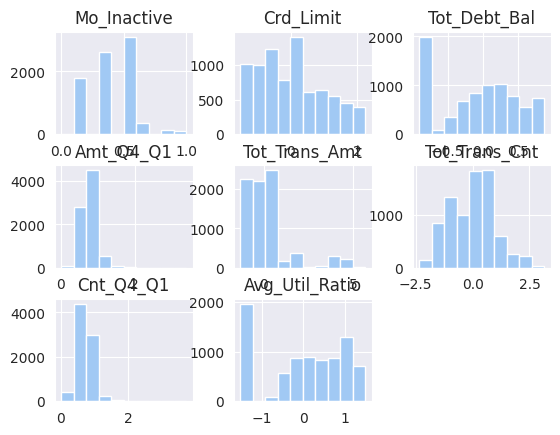

In [71]:
X_train.select_dtypes('number').hist()
plt.xticks([]);

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 6030 to 8446
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     8101 non-null   category
 1   Income                     8101 non-null   category
 2   Tot_Products               8101 non-null   category
 3   Mo_Inactive                8101 non-null   float64 
 4   Contacts_Count             8101 non-null   category
 5   Crd_Limit                  8101 non-null   float64 
 6   Tot_Debt_Bal               8101 non-null   float64 
 7   Amt_Q4_Q1                  8101 non-null   float64 
 8   Tot_Trans_Amt              8101 non-null   float64 
 9   Tot_Trans_Cnt              8101 non-null   float64 
 10  Cnt_Q4_Q1                  8101 non-null   float64 
 11  Avg_Util_Ratio             8101 non-null   float64 
 12  AgeRange                   8101 non-null   category
 13  Tot_Trans_Amt_categorized  8101 non

# training

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc

In [74]:
from imblearn.pipeline import Pipeline

# Pipeline for Naive Bayes
naive_bayes_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('smote', SMOTE()),
    ('classifier', GaussianNB())
])

# Pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('smote', SMOTE()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Pipeline for RandomForest
random_forest_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('smote', SMOTE()),
    ('classifier', RandomForestClassifier())
])

# Pipeline for Bagging
bagging_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('smote', SMOTE()),
    ('classifier', BaggingClassifier())
])

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

In [76]:
# Naive Bayes parameter grid (No hyperparameters to tune)
naive_bayes_param_grid = {}

# Logistic Regression parameter grid
logistic_regression_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [1000]
}

# RandomForest parameter grid
random_forest_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__n_jobs' : [-1],
    'classifier__bootstrap': [True, False]
}

# Bagging parameter grid
bagging_param_grid = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_samples': [0.5, 1.0],
    'classifier__max_features': [0.5, 1.0],
    'classifier__bootstrap': [True, False],
    'classifier__bootstrap_features': [True, False]
}

param_grids = [
    naive_bayes_param_grid,
    logistic_regression_param_grid,
    random_forest_param_grid,
    bagging_param_grid
]


In [77]:
# Initialize a list to store the best models
best_models = []
f1_scorer = make_scorer(f1_score, pos_label=1)


# Run grid search CV for each pipeline
for name, pipeline, param_grid in zip(
        ['Naive Bayes', 'Logistic Regression', 'RandomForest', 'Bagging'],
        [naive_bayes_pipeline, logistic_regression_pipeline, random_forest_pipeline, bagging_pipeline],
        param_grids
):
    print(f"Running GridSearchCV for {name}...")
    
    # Initialize grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=5),
        scoring=f1_scorer,
        verbose=1,
        n_jobs=-1
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    best_models.append((name, best_model))
    
    # Print best parameters and best score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

Running GridSearchCV for Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Naive Bayes: {}
Best score for Naive Bayes: 0.42429986758445726
Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__max_iter': 1000}
Best score for Logistic Regression: 0.7360386068497413
Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for RandomForest: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'classifier__n_jobs': -1}
Best score for RandomForest: 0.6550112085526922
Running GridSearchCV for Bagging...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Bagging: {'classifier__bootstrap': True, 'classifier__bootstra

In [78]:
# Print classification report
for name, model in best_models:
    print(f"Classification Report for {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1701
           1       0.59      0.43      0.50       325

    accuracy                           0.86      2026
   macro avg       0.74      0.69      0.71      2026
weighted avg       0.85      0.86      0.85      2026

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1701
           1       0.71      0.71      0.71       325

    accuracy                           0.91      2026
   macro avg       0.83      0.83      0.83      2026
weighted avg       0.91      0.91      0.91      2026

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.78      0.55      0.65       325

    accuracy                           0.90      2026
  

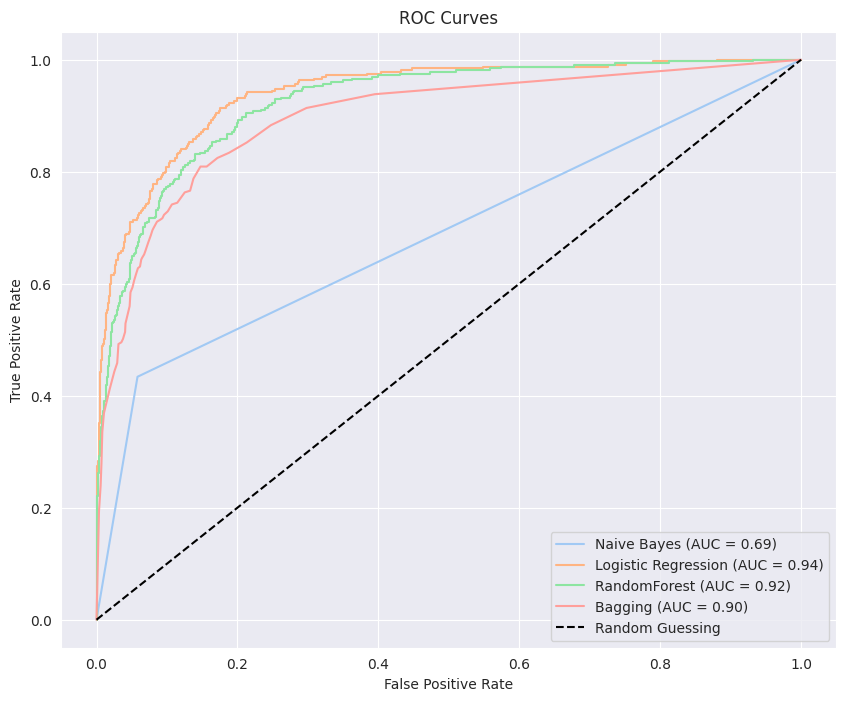

In [79]:
# Plot ROC AUC curves
plt.figure(figsize=(10, 8))
for name, model in best_models:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

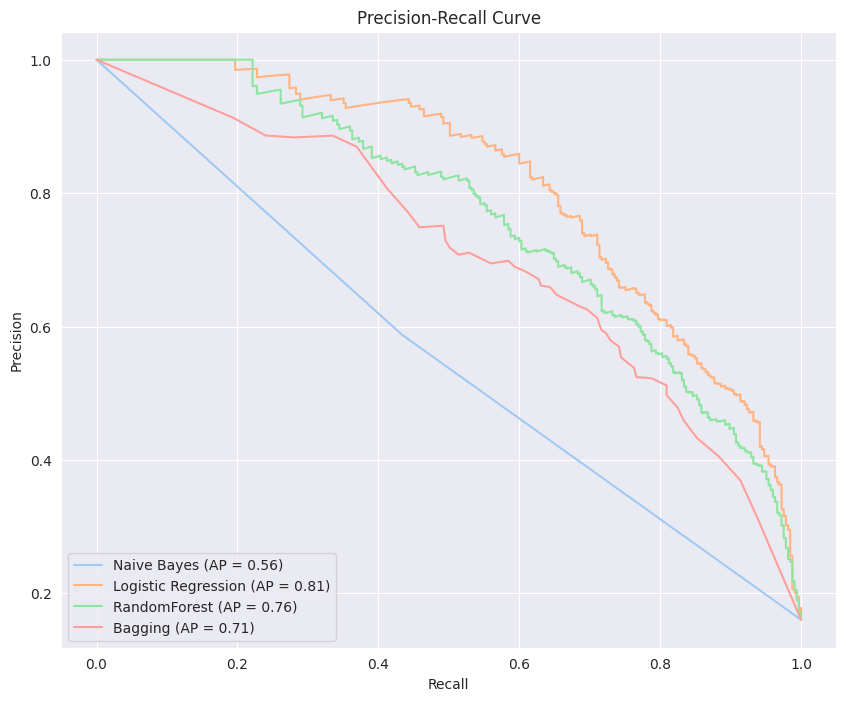

In [80]:
# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for name, model in best_models:
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
